# Análisis de datos:

$~$

Los datos estan limitados a las siguientes restricciones:

+ Datos de importacion (Cristal box importacion)
+ Año de escala = 2022
+ Puerto de la escala = HUTCHISON PORTS BEST
$~$

### Importación de las librerias necesarias y carga de datos

In [2]:
# importacion de las librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as snsg
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')



### Carga de datos

In [3]:
#read data.csv
df = pd.read_csv('data_1.csv', 
                dtype={'ESCALA':'category',
                        'CONSIGNATARI_23':'category'},
                parse_dates=['DATA_ENTRADA_PREVISTA_23','DATA_HORA_ENTRADA_23','DATA_SORTIDA_PREVISTA_23','DATA_HORA_SORTIDA_23'])

In [4]:
#show data
df.head()

,ESCALA,CONSIGNATARI_23,DATA_ENTRADA_PREVISTA_23,DATA_SORTIDA_PREVISTA_23,DATA_HORA_ENTRADA_23,DATA_HORA_SORTIDA_23
0,31497,MARITIMA DEL MEDITERRANEO SA,2022-01-14 14:24:00,2022-01-16 20:00:00,2022-01-14 14:24:00,2022-01-17 03:42:00
1,31500,MARITIMA DEL MEDITERRANEO SA,2022-01-15 23:00:00,2022-01-16 14:00:00,2022-01-16 02:41:00,2022-01-16 18:26:00
2,31510,MEDITERRANEAN SHIPPING COM ESPANA S,2022-01-24 16:00:00,2022-01-25 16:00:00,2022-01-24 15:47:00,2022-01-25 03:19:00
3,31533,MEDITERRANEAN SHIPPING COM ESPANA S,2022-01-23 12:00:00,2022-01-24 03:00:00,2022-01-23 18:35:00,2022-01-24 07:43:00
4,31534,MEDITERRANEAN SHIPPING COM ESPANA S,2022-01-29 06:00:00,2022-01-29 23:42:00,2022-01-29 23:40:00,2022-01-30 17:38:00


In [5]:
#show data types
df.dtypes

ESCALA                            category
CONSIGNATARI_23                   category
DATA_ENTRADA_PREVISTA_23    datetime64[ns]
DATA_SORTIDA_PREVISTA_23    datetime64[ns]
DATA_HORA_ENTRADA_23        datetime64[ns]
DATA_HORA_SORTIDA_23        datetime64[ns]
dtype: object

### 

In [6]:
# calcula la diferencia entre la fecha prevista de entrada y la fecha de entrada en horas.
df['DIFERENCIA_ENTRADA'] = (df['DATA_HORA_ENTRADA_23'] - df['DATA_ENTRADA_PREVISTA_23']) / np.timedelta64(1, 'h')


In [7]:
# calcula la diferencia entre la fecha prevista de salida y la fecha de salida en horas.
df['DIFERENCIA_SALIDA'] = (df['DATA_HORA_SORTIDA_23'] - df['DATA_SORTIDA_PREVISTA_23']) / np.timedelta64(1, 'h')


In [8]:
# verifica si hay valores nulos
df.isnull().sum()

ESCALA                      0
CONSIGNATARI_23             0
DATA_ENTRADA_PREVISTA_23    0
DATA_SORTIDA_PREVISTA_23    0
DATA_HORA_ENTRADA_23        0
DATA_HORA_SORTIDA_23        0
DIFERENCIA_ENTRADA          0
DIFERENCIA_SALIDA           0
dtype: int64

____

___

## Analisis de datos

1. estadísticas descriptivas: Generación de estadísticas descriptivas para nuestros datos.

In [9]:
# muestras las estadisticas de la columna DIFERENCIA_ENTRADA, DIFERENCIA_SALIDA
df[['DIFERENCIA_ENTRADA','DIFERENCIA_SALIDA']].describe().round(2)



,DIFERENCIA_ENTRADA,DIFERENCIA_SALIDA
count,653.00,653.00
mean,5.64,5.79
std,11.81,12.52
min,-22.02,-36.30
25%,0.47,-0.17
50%,2.88,3.55
75%,6.70,9.67
max,141.07,126.22


$~$

A partir de las estadísticas que se presentan, se pueden inferir varias conclusiones sobre las diferencias de entrada y salida en horas de las escalas que se está analizando. Algunas de ellas podrían ser:

+ En promedio, la diferencia entre la fecha prevista de entrada y la fecha de entrada real es de 5.64 horas, y la diferencia entre la fecha prevista de salida y la fecha de salida real es de 5.79 horas.

+ La desviación estándar para las diferencias de entrada y salida es significativa, con 11.81 y 12.52 horas respectivamente, indicando que hay una gran variabilidad en las diferencias entre fechas previstas y reales.

+ El 25% de las diferencias de entrada son de 0.47 horas o menos, y el 25% de las diferencias de salida son de -0.17 horas o menos. Esto indica que la mayoría de las entradas y salidas ocurren dentro de un margen cercano a la fecha prevista, pero hay una gran cantidad de entradas y salidas que ocurren con una diferencia significativa respecto a la fecha prevista.

+ El 50% de las diferencias de entrada son de 2.88 horas o menos, y el 50% de las diferencias de salida son de 3.55 horas o menos.

+ El 75% de las diferencias de entrada son de 6.70 horas o menos, y el 75% de las diferencias de salida son de 9.67 horas o menos.
La diferencia máxima entre fecha prevista y real para la entrada es de 141.07 horas, y para la salida es 126.22 horas, lo que indica que hay casos extremos en los que la diferencia es muy grande.


$~$

_____

## DIFERENCIA ENTRADA

$~$


$~$

DIFERENCIA_ENTRADA es una variable numérica  que refleja en horas la diferencia entre las horas previstas y las reales de entrada de los barcos(ESCALAS), así se pueden hacer estadisticas, analisis y graficar esa variable para tener una idea de cuanto se retrasa en promedio un barco en su entrada.

$~$

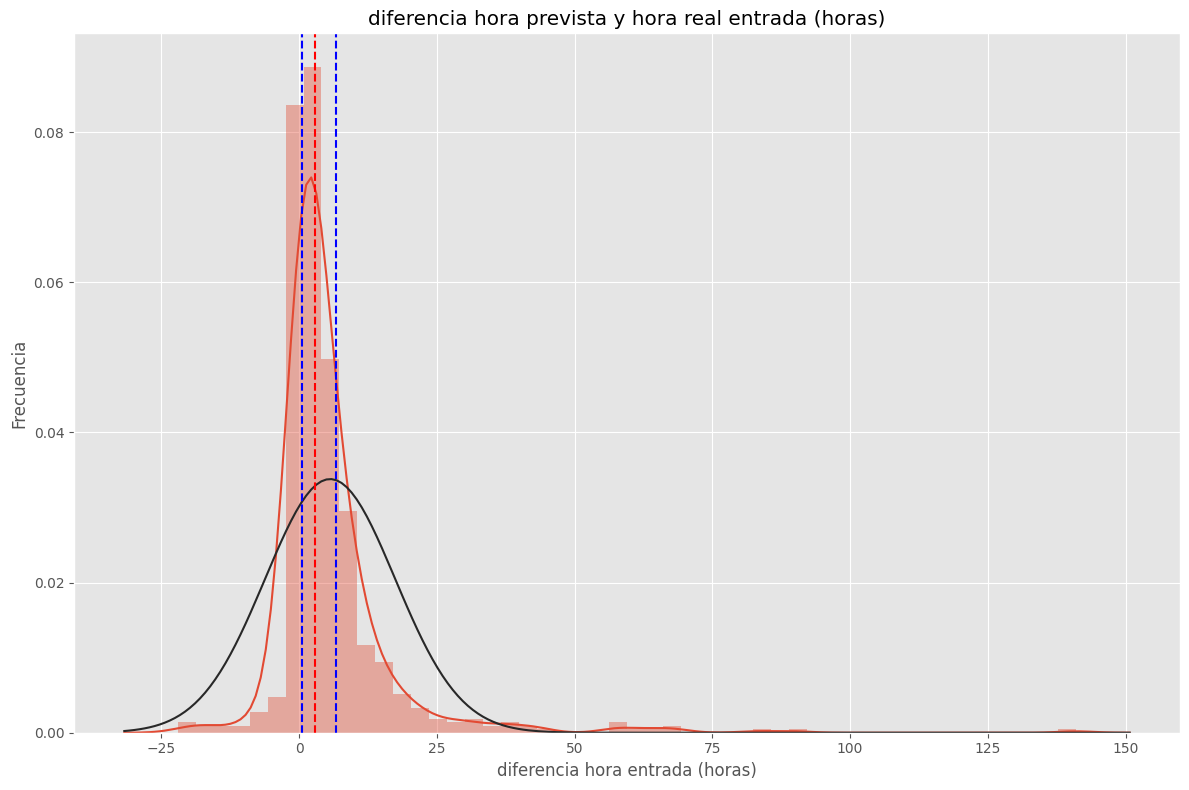

In [10]:
# crea un histograma (sns) de la columna DIFERENCIA_ENTRADA
# define el estilo como ggplot
plt.style.use('ggplot')


# definimos el tamaño de la figura
plt.figure(figsize=(12, 8))
# definimos el tipo de grafico
sns.distplot(df['DIFERENCIA_ENTRADA'], fit=norm)
# definimos el titulo
plt.title('diferencia hora prevista y hora real entrada (horas)')
# definimos la etiqueta del eje x
plt.xlabel('diferencia hora entrada (horas)')
# definimos la etiqueta del eje y
plt.ylabel('Frecuencia')
# añade una linea vertical en percentil 0.50 ,0.75 y 25 de la distribución
plt.axvline(df['DIFERENCIA_ENTRADA'].quantile(0.50), color='r', linestyle='--')
plt.axvline(df['DIFERENCIA_ENTRADA'].quantile(0.75), color='b', linestyle='--')
plt.axvline(df['DIFERENCIA_ENTRADA'].quantile(0.25), color='b', linestyle='--')
# mostramos el grafico
plt.tight_layout()
plt.show()


In [11]:
# Calcula la media aritmética
mean = np.mean(df.DIFERENCIA_ENTRADA)
print("La media es: {:.2f}".format(mean))
# Calcula la mediana
median = np.median(df.DIFERENCIA_ENTRADA)
print("La mediana es: {:.2f}".format(median))
# Calcula la moda
mode, count = stats.mode(df.DIFERENCIA_ENTRADA)
print("La moda es: {:.2f} y se repite {} veces".format(mode[0], count[0]))
# Comprueba si la distribución es simétrica o sesgada
if mean == median and mean == mode:
    print("La distribución es simétrica")
elif mean > median:
    print("La distribución es sesgada a la derecha")
else:
    print("La distribución es sesgada a la izquierda")

La media es: 5.64
La mediana es: 2.88
La moda es: 0.00 y se repite 19 veces
La distribución es sesgada a la derecha


$~$

Con este gráfico y los datos anteriores, se puede concluir que la diferencia entre la hora real de entrada y la hora prevista de entrada de los barcos tiende a ser positiva, es decir, que en general los barcos están llegando más tarde a puerto de lo previsto. Esto se observa en el gráfico donde la mayoría de los datos se encuentran a la derecha de cero, y en los datos estadísticos, donde la media es mayor a cero (5.64 horas) y la mediana también es mayor a cero (2.88 horas).

+ La media de esta variable es de 5.64 horas. Esto significa que, en promedio, los barcos llegan unas 5.64 horas más tarde de lo previsto.

+ La mediana es de 2.88 horas, lo que indica que la mitad de los barcos llegan entre 2.88 horas más tarde o antes de lo previsto.

+ La moda es de 0.00 horas y se repite 19 veces, lo que significa que hay un gran número de barcos que llegan a tiempo o en el mismo tiempo previsto.

+ La distribución es sesgada a la derecha, esto significa que hay una mayor cantidad de barcos que llegan más tarde de lo previsto.

En resumen, los barcos en general llegan con retraso a su hora de entrada prevista, pero hay un grupo importante de barcos que llegan a tiempo. **Es importante evaluar la causa de estos retrasos y ver cómo pueden ser minimizados.**

$~$

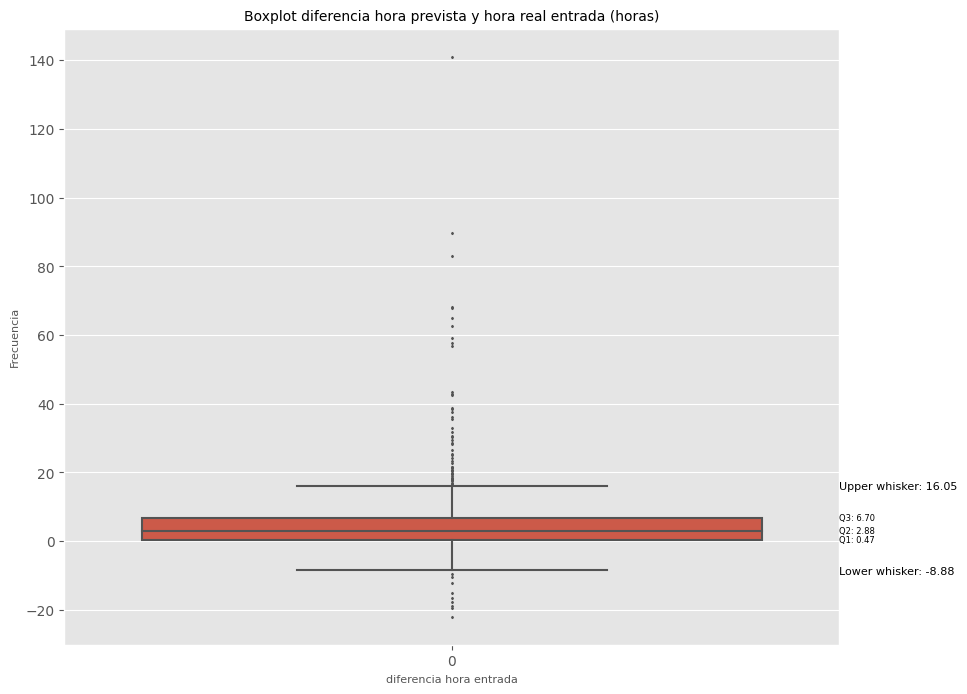

In [12]:
# crea un boxplot de la columna DIFERENCIA_ENTRADA
# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
plt.figure(figsize=(10, 8))
# definimos el tipo de grafico
sns.boxplot(df['DIFERENCIA_ENTRADA'],fliersize=1.2)
# definimos el titulo
plt.gca().set_title('Boxplot diferencia hora prevista y hora real entrada (horas)', fontsize=10)
# definimos la etiqueta del eje x
plt.gca().set_xlabel('diferencia hora entrada',fontsize=8)
# definimos la etiqueta del eje y
plt.gca().set_ylabel('Frecuencia',fontsize=8)
# Obtén los valores de los cuartiles usando el método quantile de pandas
q1 = df['DIFERENCIA_ENTRADA'].quantile(0.25)
q3 = df['DIFERENCIA_ENTRADA'].quantile(0.75)
q2 = df['DIFERENCIA_ENTRADA'].quantile(0.50)
# Calcula el rango intercuartílico
iqr = q3 - q1
# Calcula los límites inferior y superior
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Añade notas con los valores de los cuartiles en el gráfico
plt.gca().text(x=0.5, y=q1, s="Q1: {:.2f}".format(q1), va="center", ha="left",fontsize=6)
plt.gca().text(x=0.5, y=q2, s="Q2: {:.2f}".format(q2), va="center", ha="left",fontsize=6)
plt.gca().text(x=0.5, y=q3, s="Q3: {:.2f}".format(q3), va="center", ha="left",fontsize=6)
# Añade notas con los valores de los bigotes en el gráfico
plt.gca().text(x=0.5, y=lower_limit, s="Lower whisker: {:.2f}".format(lower_limit), va="center", ha="left", fontsize=8)
plt.gca().text(x=0.5, y=upper_limit, s="Upper whisker: {:.2f}".format(upper_limit), va="center", ha="left", fontsize=8)

plt.show()

$~$

En el gráfico anterior los puntos fuera de los bigotes (whiskers) son valores que están por fuera del rango (q1 - 1.5 * iqr, q3 + 1.5 * iqr) por lo que puede ser considerados como outliers.

En este caso, se puede ver que hay un gran número de valores con diferencia mayor a 0 (o sea, retrasos) y también se pueden ver varios outlier que están muy lejos del rango intercuartilico y que podrían representar casos extremos.

Además, se puede ver que los datos tienen una media de 5.64 horas y una mediana de 2.88 horas, lo cual indica que hay algunos casos extremos de retraso que afectan el valor de la media.

$~$

In [13]:
# agrupa los datos de DIFERENCIA_ENTRADA por consignatarios. ordena por count

df.groupby('CONSIGNATARI_23')['DIFERENCIA_ENTRADA'].describe(
).sort_values(by='count', ascending=False).round(2)


,count,mean,std,min,25%,50%,75%,max
CONSIGNATARI_23,,,,,,,,
MEDITERRANEAN SHIPPING COM ESPANA S,289.0,5.79,13.17,-22.02,0.42,3.02,6.67,141.07
CMA CGM IBERICA SAU,157.0,5.33,10.11,-18.78,0.48,2.33,7.35,62.57
MARITIMA DEL MEDITERRANEO SA,107.0,4.84,9.42,-1.52,0.43,2.30,5.82,67.85
WEC LINES ESPANA SLU,49.0,7.14,7.07,-5.95,4.32,5.25,9.57,43.45
SOLUCIONES INTEGRALES MARITIMAS SLU,16.0,-1.08,2.63,-10.43,-1.00,-0.79,-0.22,1.62
HAPAG LLOYD SPAIN SL,8.0,9.92,20.45,-6.33,1.53,3.27,8.29,59.03
ORIENT OVERSEAS CONTAINER LINE SPAI,8.0,6.54,8.69,0.00,1.54,3.61,6.88,26.40
A PEREZ Y CIA SL,6.0,24.73,34.07,2.22,5.00,8.55,28.80,89.70
AGENCIA MARITIMA ESPANOLA EVGE SA,6.0,7.17,7.69,-0.60,1.74,4.59,12.88,17.98


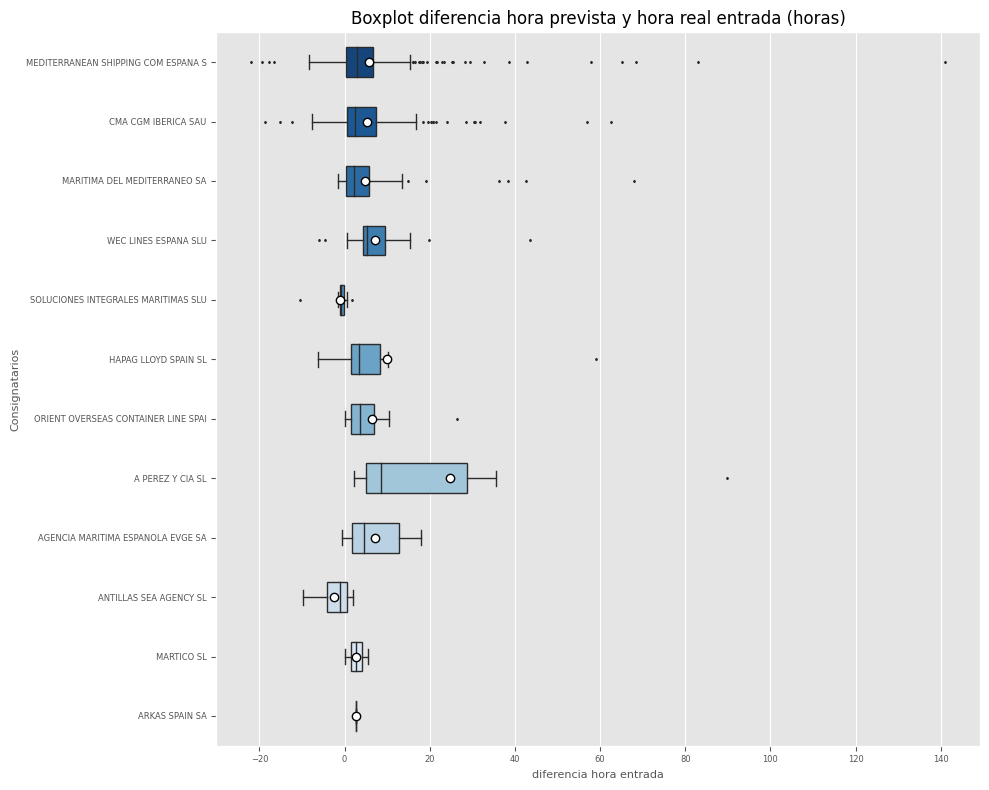

In [14]:
# crea un boxplot de la columna DIFERENCIA_ENTRADA agrupado por consignatarios
# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
plt.figure(figsize=(10, 8))
# definimos el tipo de grafico (ordenamos por count, y= "CONSIGNATARI_23", x= "DIFERENCIA_ENTRADA")
sns.boxplot(y="CONSIGNATARI_23", x="DIFERENCIA_ENTRADA", data=df, order=df.groupby('CONSIGNATARI_23')['DIFERENCIA_ENTRADA'].count().sort_values(ascending=False).index,
            fliersize=1.2, palette='Blues_r', linewidth=1, width=0.5, saturation=0.8, 
            showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"},showfliers=True)
# definimos el titulo
plt.gca().set_title('Boxplot diferencia hora prevista y hora real entrada (horas)', fontsize=12)
# definimos la etiqueta del eje x
plt.gca().set_xlabel('diferencia hora entrada',fontsize=8)
# definimos la etiqueta del eje y
plt.gca().set_ylabel('Consignatarios',fontsize=8)
# cambiamos el tamaño de la fuente de los ejes
plt.gca().tick_params(axis='both', which='major', labelsize=6)
# mostramos el grafico
plt.tight_layout()
plt.show()



del gráfico de boxplot agrupado por consignatarios, se pueden observar varias cosas:

+ Los consignatarios tienen una gran variabilidad en la diferencia entre la hora prevista y la real de entrada, esto se puede ver en la amplitud de los bigotes en los gráficos.
    
+    Mediante los estadísticos obtenidos como count, mean, std, min, 25%, 50%, 75% y max, se puede observar que la diferencia de hora de entrada es mayor en consignatarios como Mediterranean Shipping Com España S con una diferencia promedio de 5.79 horas, mientras que en consignatarios como Martico SL es menor con una diferencia promedio de 2.75 horas.

+ También se pueden observar outliers (valores atípicos) en algunos consignatarios, esto se puede observar en los puntos más alejados de los bigotes en los gráficos. Por ejemplo en Mediterranean Shipping Com España S y A Perez y Cia SL.
    
+ Por otro lado el ordenamiento se realizo en base al count, es decir se ordeno por la frecuencia de los consignatarios (a más oscuro el azul, más elementos)


*El punto blanco en el gráfico es un indicador de la media de los datos agrupados por cada consignatario*

______

## DIFERENCIA SALIDA

$~$

DIFERENCIA SALIDA es una variable que indica la diferencia en horas entre la hora prevista y la hora real de salida del barco.

$~$

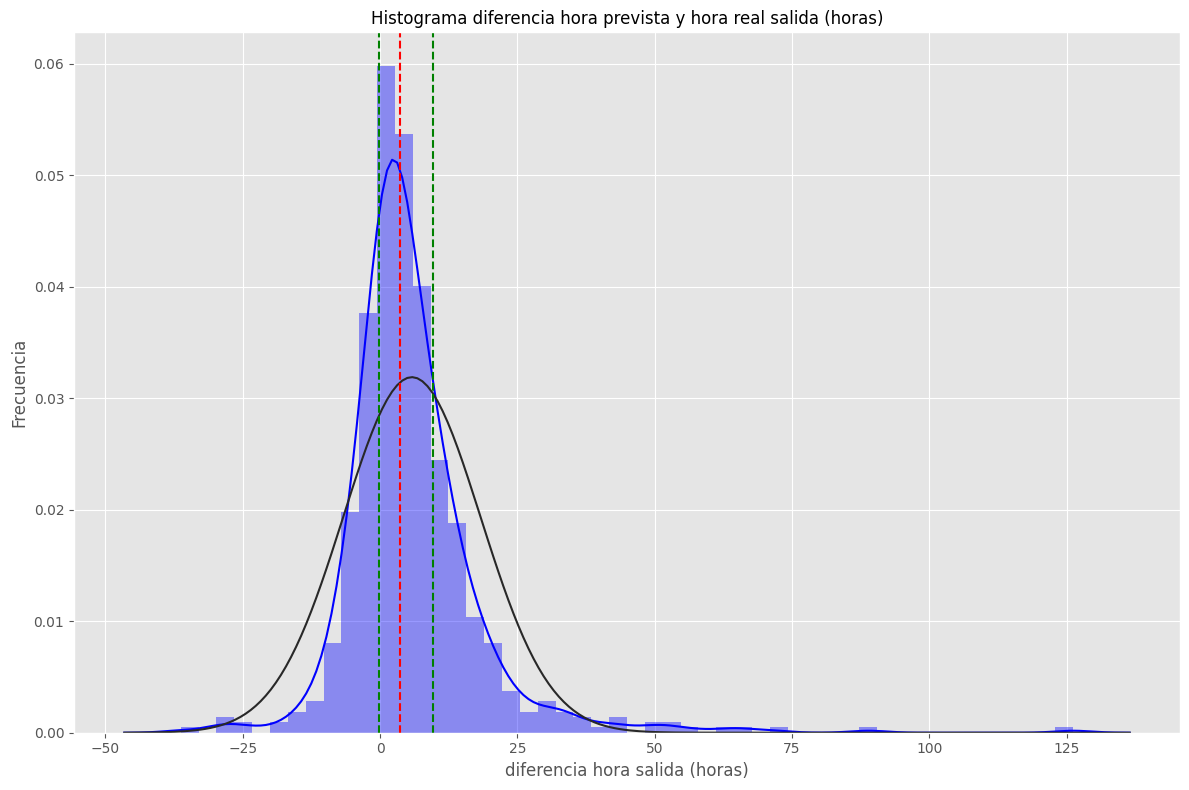

In [15]:
# crea un histograma (sns) de la columna DIFERENCIA_SALIDA
# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
plt.figure(figsize=(12, 8))
# definimos el tipo de grafico
sns.distplot(df['DIFERENCIA_SALIDA'], fit=norm,  color='blue', hist_kws={"alpha": 0.4}, kde=True)
# definimos el titulo
plt.gca().set_title('Histograma diferencia hora prevista y hora real salida (horas)', fontsize=12)
# definimos la etiqueta del eje x
plt.xlabel('diferencia hora salida (horas)')
# definimos la etiqueta del eje y
plt.ylabel('Frecuencia')
# añade una linea vertical en percentil, 0.25, 0.5, 0.75 de la distribucion
plt.axvline(df['DIFERENCIA_SALIDA'].quantile(0.25), color='g', linestyle='--')
plt.axvline(df['DIFERENCIA_SALIDA'].quantile(0.5), color='r', linestyle='--')
plt.axvline(df['DIFERENCIA_SALIDA'].quantile(0.75), color='g', linestyle='--')
# mostramos el grafico
plt.tight_layout()
plt.show()

In [16]:
# Calcula la media aritmética
mean = np.mean(df.DIFERENCIA_SALIDA)
print("La media es: {:.2f}".format(mean))
# Calcula la mediana
median = np.median(df.DIFERENCIA_SALIDA)
print("La mediana es: {:.2f}".format(median))
# Calcula la moda
mode, count = stats.mode(df.DIFERENCIA_SALIDA)
print("La moda es: {:.2f} y se repite {} veces".format(mode[0], count[0]))
# Comprueba si la distribución es simétrica o sesgada
if mean == median and mean == mode:
    print("La distribución es simétrica")
elif mean > median:
    print("La distribución es sesgada a la derecha")
else:
    print("La distribución es sesgada a la izquierda")

La media es: 5.79
La mediana es: 3.55
La moda es: 2.73 y se repite 4 veces
La distribución es sesgada a la derecha


Con este gráfico y estos datos, se pueden observar varios aspectos interesantes sobre la diferencia entre la hora prevista y la hora real de salida de los barcos.

+    La media de DIFERENCIA_SALIDA es de 5.79 horas, lo que indica que en promedio, la hora real de salida de los barcos es 5.79 horas más tarde que la hora prevista de salida.

+    La mediana de DIFERENCIA_SALIDA es de 3.55 horas, lo que significa que la mitad de las salidas de los barcos ocurrieron 3.55 horas más tarde de lo previsto.

+    La moda de DIFERENCIA_SALIDA es de 2.73 horas, con una repetición de 4 veces. Esto significa que la mayoría de las salidas de los barcos ocurrieron 2.73 horas más tarde de lo previsto.

+    La distribución de DIFERENCIA_SALIDA es sesgada a la derecha, lo que significa que hay una mayor cantidad de valores en la cola derecha de la distribución, lo que indica que hay más salidas tardías de lo previsto que puntuales.


En conjunto estas conclusiones sugieren que las salidas de los barcos suelen ser más tardías que lo previsto, con un promedio de retraso de 5.79 horas y una mayoría de salidas tardías de 2.73 horas. Esto podria ser importante para investigar las causas de los retrasos y tomar medidas para reducirlos.


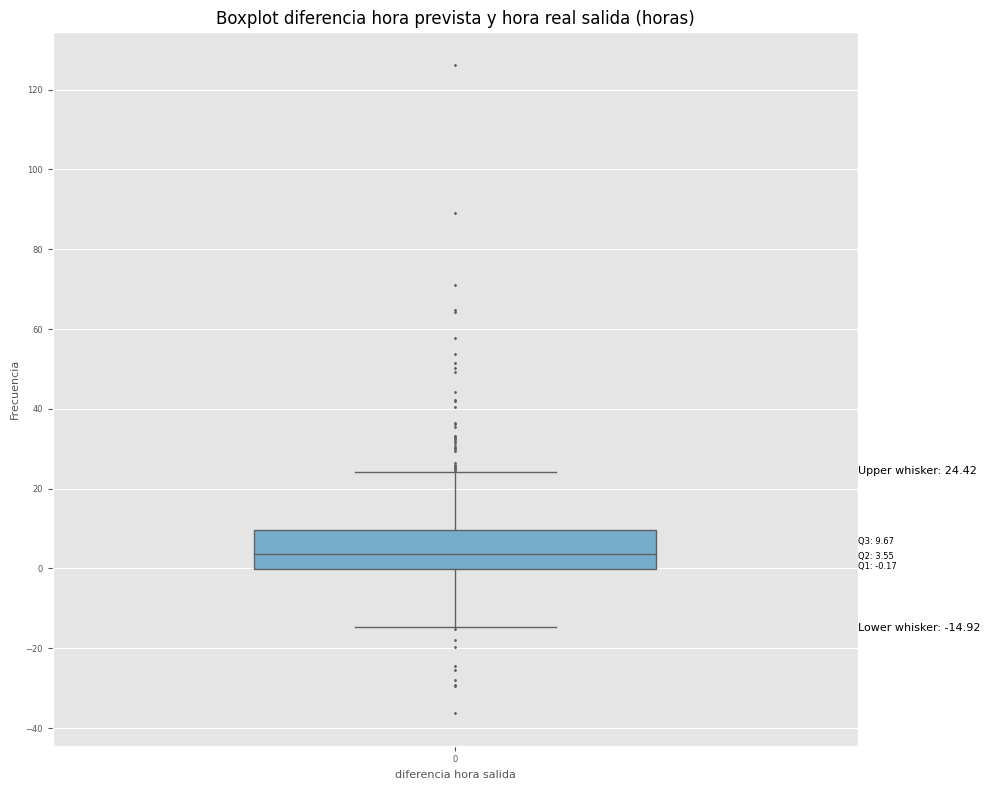

In [17]:
# crea un boxplot de la columna DIFERENCIA_SALIDA
# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
plt.figure(figsize=(10, 8))
# definimos el tipo de grafico
sns.boxplot(df['DIFERENCIA_SALIDA'], color='blue', fliersize=1.2, palette='Blues_r', linewidth=1, width=0.5, saturation=0.8)
# definimos el titulo
plt.gca().set_title('Boxplot diferencia hora prevista y hora real salida (horas)', fontsize=12)
# definimos la etiqueta del eje x
plt.gca().set_xlabel('diferencia hora salida',fontsize=8)
# definimos la etiqueta del eje y
plt.gca().set_ylabel('Frecuencia',fontsize=8)
# cambiamos el tamaño de la fuente de los ejes
plt.gca().tick_params(axis='both', which='major', labelsize=6)
# obtenemos los valores de los cuartiles usando el método quantile de pandas
q1_s = df['DIFERENCIA_SALIDA'].quantile(0.25)
q3_s = df['DIFERENCIA_SALIDA'].quantile(0.75)
q2_s = df['DIFERENCIA_SALIDA'].quantile(0.5)
# calculamos el rango intercuartil
iqr_s = q3_s - q1_s
# calculamos los limites inferior y superior
lower_limit_s = q1_s - 1.5 * iqr_s
upper_limit_s = q3_s + 1.5 * iqr_s

# añade notas con los valores de los cuartiles en el gráfico
# Añade notas con los valores de los cuartiles en el gráfico
plt.gca().text(x=0.5, y=q1, s="Q1: {:.2f}".format(q1_s), va="center", ha="left",fontsize=6)
plt.gca().text(x=0.5, y=q2, s="Q2: {:.2f}".format(q2_s), va="center", ha="left",fontsize=6)
plt.gca().text(x=0.5, y=q3, s="Q3: {:.2f}".format(q3_s), va="center", ha="left",fontsize=6)
# Añade notas con los valores de los bigotes en el gráfico
plt.gca().text(x=0.5, y=lower_limit_s, s="Lower whisker: {:.2f}".format(lower_limit_s), va="center", ha="left", fontsize=8)
plt.gca().text(x=0.5, y=upper_limit_s, s="Upper whisker: {:.2f}".format(upper_limit_s), va="center", ha="left", fontsize=8)

plt.tight_layout()

plt.show()



A partir de este gráfico y los datos proporcionados, se pueden concluir algunas cosas sobre la variable "DIFERENCIA_SALIDA":

+ Los valores más bajos de la variable se encuentran cerca de -0.17 horas y los valores más altos se encuentran cerca de 9.67 horas. El rango de la variable es de alrededor de 24.41 horas.

+ El cuartil 1 (Q1) es -0.16, el cuartil 2 (Q2) es el valor medio y el cuartil 3 (Q3) es 9.67. La diferencia entre el cuartil 3 y el cuartil 1 es 9.83 horas, lo que se conoce como el rango intercuartílico (IQR).

+ Los valores atípicos se encuentran entre el limite inferior de -14.92 y el limite superior de 24.41 horas.

Se puede concluir que la mayoria de las veces, los barcos no salen a la hora prevista, sino que se retrasan o anticipan en relación a la hora prevista.

$~$



In [18]:
# agrupa los datos de DIFERENCIA_SALIDA por consignatarios. Ordena por count

df.groupby('CONSIGNATARI_23')['DIFERENCIA_SALIDA'].describe(
            ).sort_values(by='count', ascending=False).round(2)

,count,mean,std,min,25%,50%,75%,max
CONSIGNATARI_23,,,,,,,,
MEDITERRANEAN SHIPPING COM ESPANA S,289.0,6.63,14.82,-29.43,-0.62,3.83,10.48,126.22
CMA CGM IBERICA SAU,157.0,6.57,12.07,-29.13,0.40,4.37,10.90,64.33
MARITIMA DEL MEDITERRANEO SA,107.0,3.91,9.60,-36.30,-1.28,3.07,8.18,33.02
WEC LINES ESPANA SLU,49.0,3.15,4.24,-11.00,0.87,3.22,4.50,15.78
SOLUCIONES INTEGRALES MARITIMAS SLU,16.0,2.60,2.70,-4.37,1.76,2.89,4.59,5.97
HAPAG LLOYD SPAIN SL,8.0,2.40,12.32,-13.18,-6.77,1.39,9.63,19.67
ORIENT OVERSEAS CONTAINER LINE SPAI,8.0,12.70,13.73,-6.58,4.65,10.85,17.93,33.12
A PEREZ Y CIA SL,6.0,11.14,9.95,-1.72,4.00,11.33,17.90,24.23
AGENCIA MARITIMA ESPANOLA EVGE SA,6.0,3.73,9.55,-7.65,-2.17,1.95,8.67,18.77


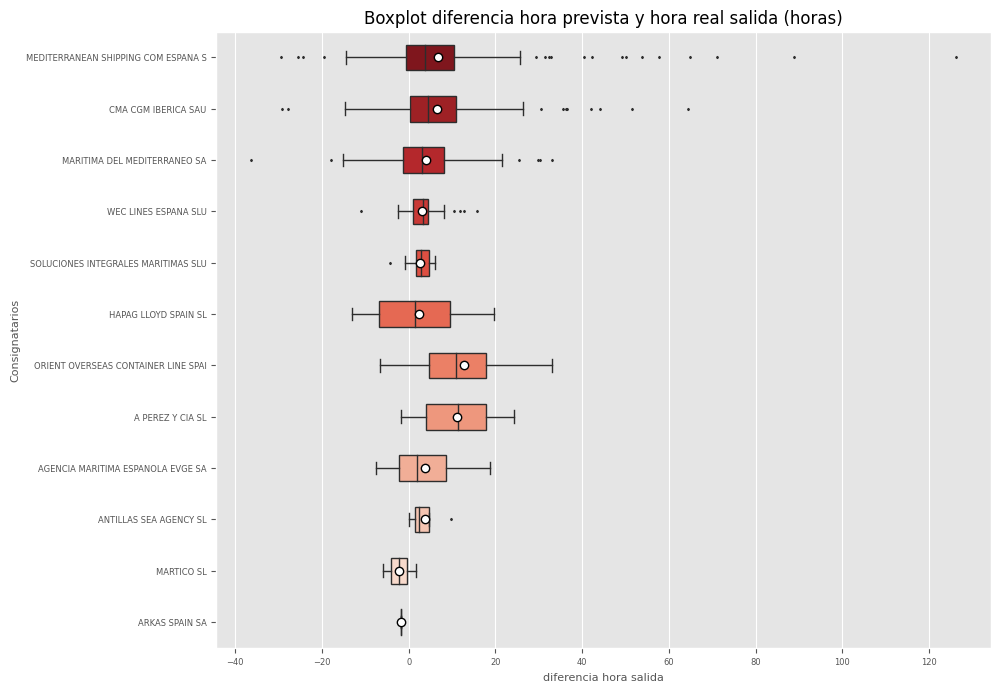

In [19]:
# crea un boxplot de la columna DIFERENCIA_SALIDA agrupado por consignatarios

#define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
plt.figure(figsize=(10, 8))
# definimos el tipo de grafico (ordenamnos por countm, y= "CONSIGNATARI_23", x=DIFERENCIA_SALIDA)
sns.boxplot(y="CONSIGNATARI_23", x="DIFERENCIA_SALIDA", data=df, 
            order=df.groupby('CONSIGNATARI_23')['DIFERENCIA_SALIDA'].describe(
            ).sort_values(by='count', 
            ascending=False).round(2).index, color='blue', 
            fliersize=1.2, palette='Reds_r', linewidth=1, width=0.5, saturation=0.8,
            showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"},showfliers=True)
# definimos el titulo
plt.gca().set_title('Boxplot diferencia hora prevista y hora real salida (horas)', fontsize=12)
# definimos la etiqueta del eje x
plt.gca().set_xlabel('diferencia hora salida',fontsize=8)
# definimos la etiqueta del eje y
plt.gca().set_ylabel('Consignatarios',fontsize=8)
# cambiamos el tamaño de la fuente de los ejes
plt.gca().tick_params(axis='both', which='major', labelsize=6)


$~$

Con este gráfico y estos datos se puede concluir que las diferencias de horas de salida previstas y reales varían significativamente entre los diferentes consignatarios.

Por ejemplo, en el caso de MEDITERRANEAN SHIPPING COM ESPANA S la media de la diferencia es 6.63 horas, mientras que en el caso de ORIENT OVERSEAS CONTAINER LINE SPAI es de 12.7 horas. En general, los consignatarios con mayor número de barcos registrados también tienen las diferencias más altas en términos de horas.

También se puede observar que hay valores atípicos (outliers) en varios consignatarios, como ORIENT OVERSEAS CONTAINER LINE SPAI y A PEREZ Y CIA SL, que tienen valores extremadamente altos de diferencia de horas de salida

$~$


___

## TIEMPO EN TERMINAL 

$~$

La variable **TIEMPO_TERMINAL** representa el tiempo que los barcos pasan en el terminal en horas, calculado como la diferencia entre la hora de salida (df['DATA_HORA_SORTIDA_23']) y la hora de entrada (df['DATA_HORA_ENTRADA_23']) en el terminal, expresado en unidades de horas 

$~$

In [20]:
# calcula la diferencia entre DATA_HORA_SORTIDA_23 y DATA_HORA_ENTRADA_23
df['TIEMPO_TERMINAL'] = (df['DATA_HORA_SORTIDA_23'] - df['DATA_HORA_ENTRADA_23']) / np.timedelta64(1, 'h')


In [21]:
df.TIEMPO_TERMINAL.describe().round(2)

count    653.00
mean      27.62
std       29.94
min        4.45
25%       12.62
50%       18.05
75%       31.42
max      409.83
Name: TIEMPO_TERMINAL, dtype: float64

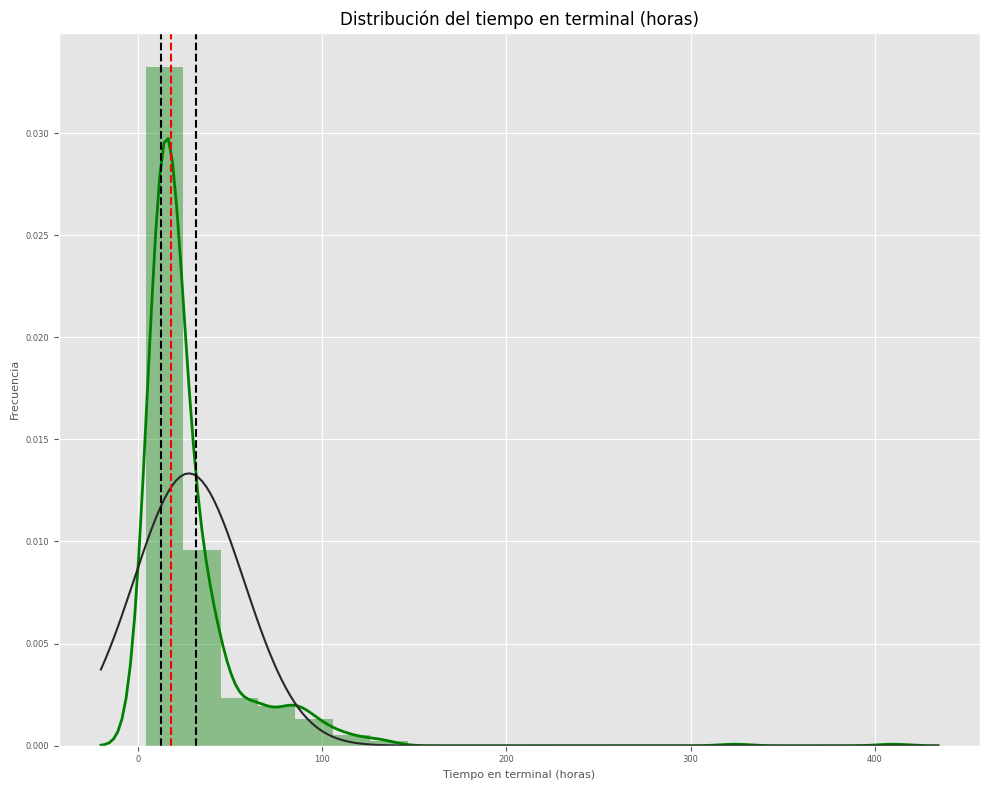

In [22]:
# crea un distplot de la columna TIEMPO_TERMINAL
# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
plt.figure(figsize=(10, 8))
# definimos el tipo de grafico
sns.distplot(df['TIEMPO_TERMINAL'], color='green', kde=True, bins=20, fit=norm, hist_kws={'alpha': 0.4}, kde_kws={'linewidth': 2})
# definimos el titulo
plt.gca().set_title('Distribución del tiempo en terminal (horas)', fontsize=12)
# definimos la etiqueta del eje x
plt.gca().set_xlabel('Tiempo en terminal (horas)',fontsize=8)
# definimos la etiqueta del eje y
plt.gca().set_ylabel('Frecuencia',fontsize=8)
# cambiamos el tamaño de la fuente de los ejes
plt.gca().tick_params(axis='both', which='major', labelsize=6)
# añade una linea vertical en los percentiles 
plt.axvline(df['TIEMPO_TERMINAL'].quantile(0.25), color='black', linestyle='--')
plt.axvline(df['TIEMPO_TERMINAL'].quantile(0.5), color='red', linestyle='--')
plt.axvline(df['TIEMPO_TERMINAL'].quantile(0.75), color='black', linestyle='--')

plt.tight_layout()
# muestra el gráfico
plt.show()


A partir de las estadísticas y el gráfico generado, se pueden extraer las siguientes conclusiones:

+ La variable mide el tiempo en horas que los barcos pasan en el terminal entre su entrada y salida.

+ El promedio de tiempo en terminal es de 27.62 horas.

+ La desviación estándar es 29.94, lo que indica que los datos están bastante dispersos.

+ El mínimo es de 4.45 horas y el máximo de 409.83 horas, lo que indica que hay un rango amplio de tiempos en terminal.

+ El 25% de los valores está por debajo de 12.62 horas, el 50% por debajo de 18.05 horas y el 75% por debajo de 31.42 horas.

+ El gráfico de distribución muestra una distribución sesgada a la derecha, con una gran cantidad de datos concentrados en valores menores a 30 horas y unos pocos valores extremadamente altos.

In [23]:
# agrupa los datos de TIEMPO_TERMINAL por consignatarios. Ordena por count

df.groupby('CONSIGNATARI_23')['TIEMPO_TERMINAL'].describe(
            ).sort_values(by='count', ascending=False).round(2)            

,count,mean,std,min,25%,50%,75%,max
CONSIGNATARI_23,,,,,,,,
MEDITERRANEAN SHIPPING COM ESPANA S,289.0,32.78,32.75,4.45,14.40,20.48,33.33,324.17
CMA CGM IBERICA SAU,157.0,25.85,34.95,5.28,12.13,17.38,35.60,409.83
MARITIMA DEL MEDITERRANEO SA,107.0,18.18,16.87,4.55,10.20,14.23,19.53,132.22
WEC LINES ESPANA SLU,49.0,15.70,4.74,9.03,12.10,15.30,17.92,33.10
SOLUCIONES INTEGRALES MARITIMAS SLU,16.0,50.24,25.07,8.05,21.66,63.60,64.55,84.57
HAPAG LLOYD SPAIN SL,8.0,31.11,12.76,11.40,24.15,29.72,38.14,49.18
ORIENT OVERSEAS CONTAINER LINE SPAI,8.0,42.55,11.45,27.02,36.11,39.76,47.07,62.23
A PEREZ Y CIA SL,6.0,20.95,9.40,11.05,16.75,17.81,22.89,38.07
AGENCIA MARITIMA ESPANOLA EVGE SA,6.0,11.96,3.77,7.95,10.03,11.00,12.72,18.80


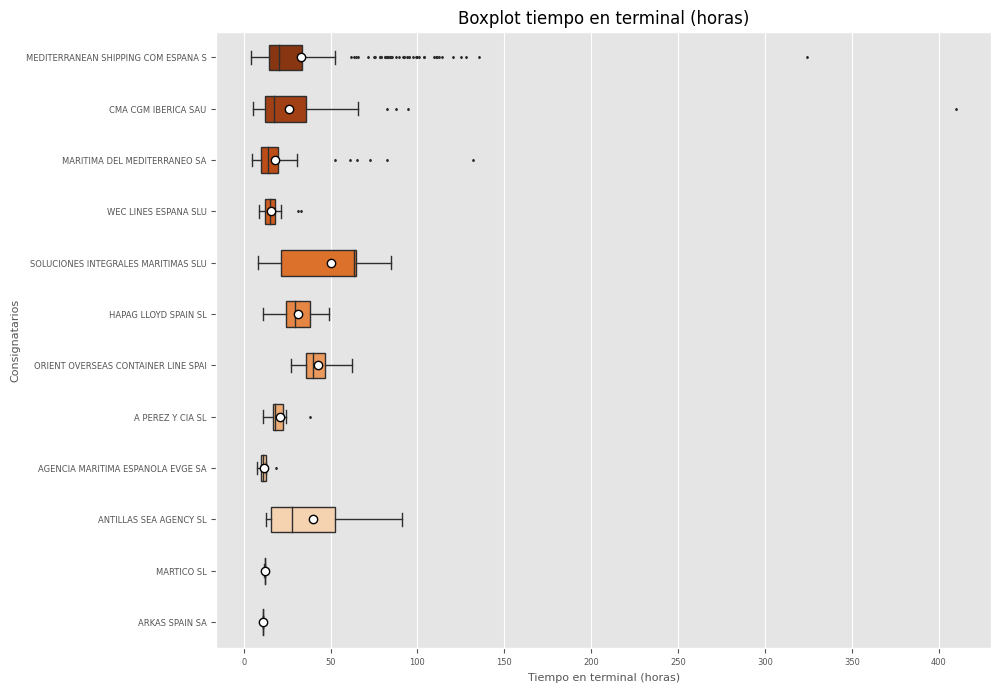

In [24]:
# crea un boxplot de la columna TIEMPO_TERMINAL agrupado por consignatarios

#define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
plt.figure(figsize=(10, 8))
# definimos el tipo de grafico (ordenamnos por countm, y= "CONSIGNATARI_23", x=TIEMPO_TERMINAL)
sns.boxplot(y="CONSIGNATARI_23", x="TIEMPO_TERMINAL", data=df,
            order=df.groupby('CONSIGNATARI_23')['TIEMPO_TERMINAL'].describe(
            ).sort_values(by='count',
            ascending=False).round(2).index, color='blue',
            fliersize=1.2, palette='Oranges_r', linewidth=1, width=0.5, saturation=0.8,
            showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"},showfliers=True)
# definimos el titulo
plt.gca().set_title('Boxplot tiempo en terminal (horas)', fontsize=12)
# definimos la etiqueta del eje x
plt.gca().set_xlabel('Tiempo en terminal (horas)',fontsize=8)
# definimos la etiqueta del eje y
plt.gca().set_ylabel('Consignatarios',fontsize=8)
# cambiamos el tamaño de la fuente de los ejes
plt.gca().tick_params(axis='both', which='major', labelsize=6)



El gráfico representa un boxplot agrupado por los consignatarios en el eje y y el tiempo que los barcos pasan en el terminal (en horas) en el eje x. Los consignatarios están ordenados por el número de observaciones (count) en el conjunto de datos. 

A partir de las estadísticas y boxplot anterior, se pueden concluir algunas cosas:

+ La media, la desviación típica, el mínimo y los percentiles permiten comprender globalmente la distribución de la columna "TIEMPO_TERMINAL".

+ En el boxplot podemos ver que hay una amplia gama de valores para la columna "TIEMPO_TERMINAL", con un mínimo de 4,45 horas y un máximo de 409,83 horas.

+ El boxplot de la distribución de la columna "TIEMPO_TERMINAL" para cada consignatario es bastante diferente, y que algunos consignatarioes tienen una gama de valores más amplia que otros.

+ Según las estadísticas, el consignatario con el mayor recuento de tiempo terminal es MEDITERRANEAN SHIPPING COM ESPANA S con la media más alta de 32,78 y con la desviación estándar más alta de 32,75.
    
+ En el boxplot también se puede observar que hay algunos valores atípicos en los datos.
    
+ por el recuento de TIEMPO_TERMINAL (número de valores) y muestra que el consignatario MEDITERRANEAN SHIPPING COM ESPANA S tiene el mayor número de valores para TIEMPO_TERMINAL y el consignatario A. PEREZ Y CIA SL tiene el menor número de valores para TIEMPO_TERMINAL.
   

### Time series

In [25]:
# crea un nuevo dataframe con la fecha de entrada como index
df_time = df.set_index('DATA_HORA_ENTRADA_23')
#agrupa los datos por meses
df_grouped = df_time.groupby(pd.Grouper(freq='m')).sum()


In [26]:
df_grouped.describe().round(2)

,DIFERENCIA_ENTRADA,DIFERENCIA_SALIDA,TIEMPO_TERMINAL
count,12.00,12.00,12.00
mean,306.95,315.12,1502.88
std,236.15,247.49,449.21
min,110.63,52.10,488.43
25%,157.58,146.00,1288.94
50%,243.64,231.77,1522.58
75%,388.97,437.61,1759.68
max,963.45,845.72,2111.55


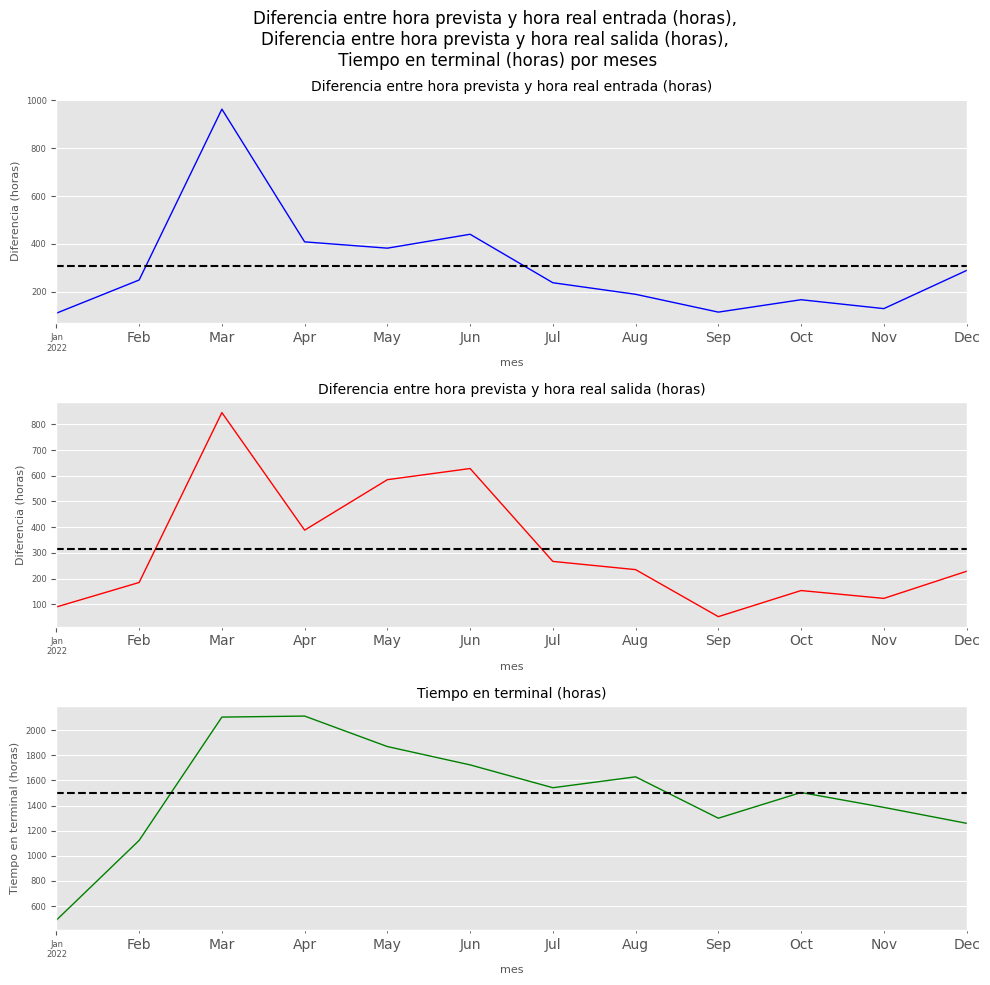

In [27]:
# crea un gráfico con las tres variables de interés (DIFERENCIA_ENTRADA, DIFERENCIA_SALIDA, TIEMPO_TERMINAL)
# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
fig, ax = plt.subplots(3, figsize=(10,10))
# definimos el tipo de grafico
df_grouped['DIFERENCIA_ENTRADA'].plot(ax=ax[0], color='blue', linewidth=1)
df_grouped['DIFERENCIA_SALIDA'].plot(ax=ax[1], color='red', linewidth=1)
df_grouped['TIEMPO_TERMINAL'].plot(ax=ax[2], color='green', linewidth=1)
# definimos el titulo
#set the title
fig.suptitle('Diferencia entre hora prevista y hora real entrada (horas),\nDiferencia entre hora prevista y hora real salida (horas),\n Tiempo en terminal (horas) por meses', fontsize=12)
# definimos el titulo
ax[0].set_title('Diferencia entre hora prevista y hora real entrada (horas)', fontsize=10)
ax[1].set_title('Diferencia entre hora prevista y hora real salida (horas)', fontsize=10)
ax[2].set_title('Tiempo en terminal (horas)', fontsize=10)
# definimos la etiqueta del eje x
ax[0].set_xlabel('mes',fontsize=8)
ax[1].set_xlabel('mes',fontsize=8)
ax[2].set_xlabel('mes',fontsize=8)
# definimos la etiqueta del eje y
ax[0].set_ylabel('Diferencia (horas)',fontsize=8)
ax[1].set_ylabel('Diferencia (horas)',fontsize=8)
ax[2].set_ylabel('Tiempo en terminal (horas)',fontsize=8)

# cambiamos el tamaño de la fuente de los ejes
ax[0].tick_params(axis='both', which='major', labelsize=6)
ax[1].tick_params(axis='both', which='major', labelsize=6)
ax[2].tick_params(axis='both', which='major', labelsize=6)

# añade linea horizontal con la media
ax[0].axhline(df_grouped['DIFERENCIA_ENTRADA'].mean(), color='black', linestyle='--')
ax[1].axhline(df_grouped['DIFERENCIA_SALIDA'].mean(), color='black', linestyle='--')
ax[2].axhline(df_grouped['TIEMPO_TERMINAL'].mean(), color='black', linestyle='--')


# muestra el gráfico
plt.tight_layout()
plt.show()




In [28]:
#agrupa los datos por semanas
df_grouped = df_time.groupby(pd.Grouper(freq='w')).sum()

df_grouped.describe().round(2)


,DIFERENCIA_ENTRADA,DIFERENCIA_SALIDA,TIEMPO_TERMINAL
count,52.00,52.00,52.00
mean,70.83,72.72,346.82
std,76.11,73.84,139.49
min,-6.83,-11.73,5.10
25%,27.38,22.62,288.71
50%,46.92,50.92,345.86
75%,92.25,111.62,414.42
max,414.65,323.82,822.22


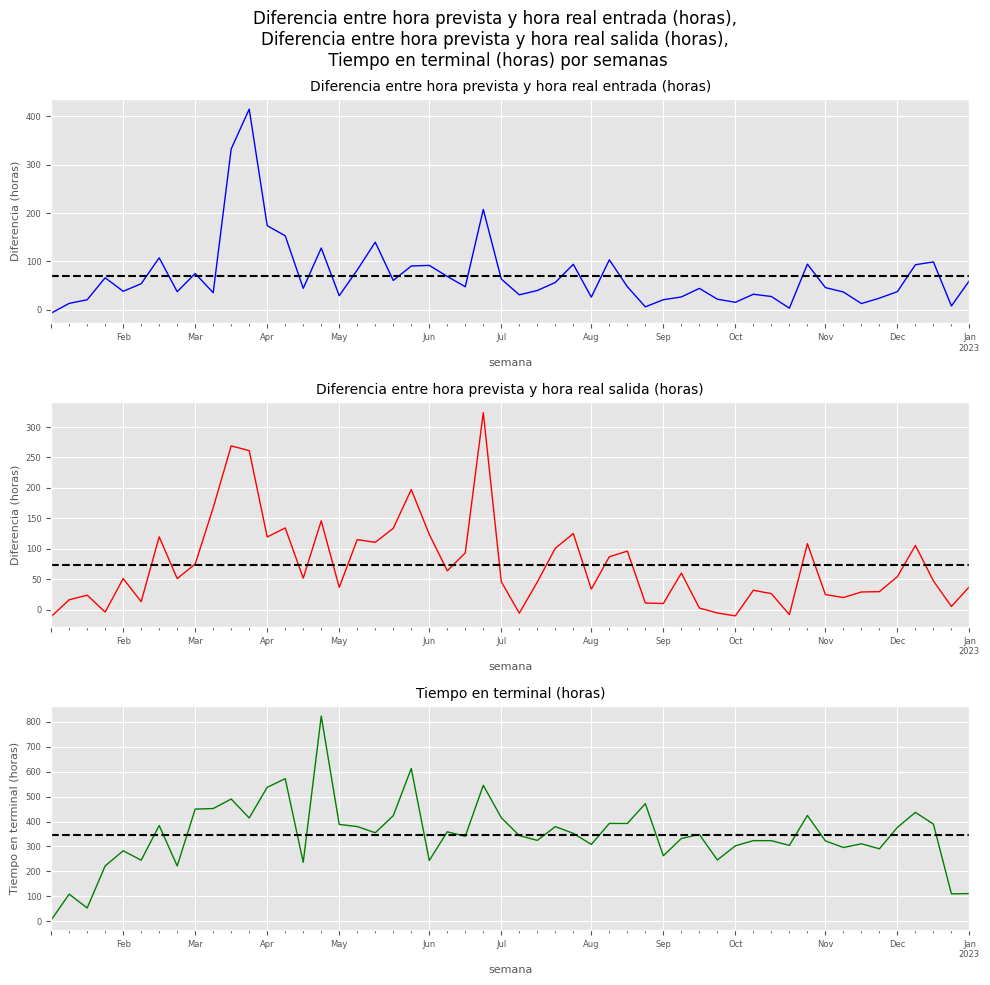

In [29]:
# crea un gráfico con las tres variables de interés (DIFERENCIA_ENTRADA, DIFERENCIA_SALIDA, TIEMPO_TERMINAL)
# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
fig, ax = plt.subplots(3, figsize=(10,10))
# definimos el tipo de grafico
df_grouped['DIFERENCIA_ENTRADA'].plot(ax=ax[0], color='blue', linewidth=1)
df_grouped['DIFERENCIA_SALIDA'].plot(ax=ax[1], color='red', linewidth=1)
df_grouped['TIEMPO_TERMINAL'].plot(ax=ax[2], color='green', linewidth=1)
# definimos el titulo
#set the title
fig.suptitle('Diferencia entre hora prevista y hora real entrada (horas),\nDiferencia entre hora prevista y hora real salida (horas),\n Tiempo en terminal (horas) por semanas', fontsize=12)
# definimos el titulo
ax[0].set_title('Diferencia entre hora prevista y hora real entrada (horas)', fontsize=10)
ax[1].set_title('Diferencia entre hora prevista y hora real salida (horas)', fontsize=10)
ax[2].set_title('Tiempo en terminal (horas)', fontsize=10)
# definimos la etiqueta del eje x
ax[0].set_xlabel('semana',fontsize=8)
ax[1].set_xlabel('semana',fontsize=8)
ax[2].set_xlabel('semana',fontsize=8)
# definimos la etiqueta del eje y
ax[0].set_ylabel('Diferencia (horas)',fontsize=8)
ax[1].set_ylabel('Diferencia (horas)',fontsize=8)
ax[2].set_ylabel('Tiempo en terminal (horas)',fontsize=8)

# cambiamos el tamaño de la fuente de los ejes
ax[0].tick_params(axis='both', which='major', labelsize=6)
ax[1].tick_params(axis='both', which='major', labelsize=6)
ax[2].tick_params(axis='both', which='major', labelsize=6)

# añade linea horizontal con la media
ax[0].axhline(df_grouped['DIFERENCIA_ENTRADA'].mean(), color='black', linestyle='--')
ax[1].axhline(df_grouped['DIFERENCIA_SALIDA'].mean(), color='black', linestyle='--')
ax[2].axhline(df_grouped['TIEMPO_TERMINAL'].mean(), color='black', linestyle='--')

# add trend line
#ax[0].plot(df_grouped['DIFERENCIA_ENTRADA'].rolling(window=4).mean(), color='black', linestyle='--')



# muestra el gráfico
plt.tight_layout()
plt.show()




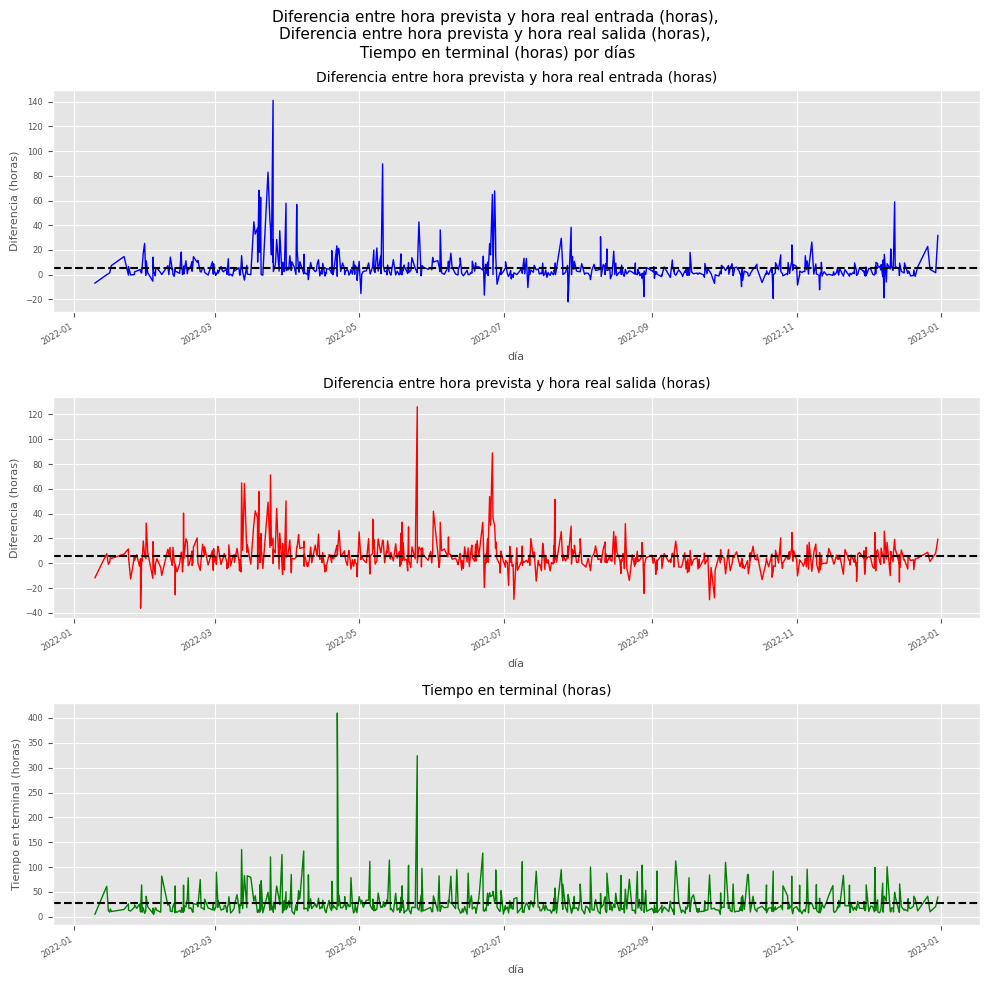

In [30]:
# crea un gráfico con las tres variables de interés (DIFERENCIA_ENTRADA, DIFERENCIA_SALIDA, TIEMPO_TERMINAL) por días

# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
fig, ax = plt.subplots(3, figsize=(10,10))
# definimos el tipo de grafico
df_time['DIFERENCIA_ENTRADA'].plot(ax=ax[0], color='blue', linewidth=1)
df_time['DIFERENCIA_SALIDA'].plot(ax=ax[1], color='red', linewidth=1)
df_time['TIEMPO_TERMINAL'].plot(ax=ax[2], color='green', linewidth=1)
# definimos el titulo
#set the title
fig.suptitle('Diferencia entre hora prevista y hora real entrada (horas),\nDiferencia entre hora prevista y hora real salida (horas),\n Tiempo en terminal (horas) por días', fontsize=11)
# definimos el titulo
ax[0].set_title('Diferencia entre hora prevista y hora real entrada (horas)', fontsize=10)
ax[1].set_title('Diferencia entre hora prevista y hora real salida (horas)', fontsize=10)
ax[2].set_title('Tiempo en terminal (horas)', fontsize=10)
# definimos la etiqueta del eje x
ax[0].set_xlabel('día',fontsize=8)
ax[1].set_xlabel('día',fontsize=8)
ax[2].set_xlabel('día',fontsize=8)
# definimos la etiqueta del eje y
ax[0].set_ylabel('Diferencia (horas)',fontsize=8)
ax[1].set_ylabel('Diferencia (horas)',fontsize=8)
ax[2].set_ylabel('Tiempo en terminal (horas)',fontsize=8)

# cambiamos el tamaño de la fuente de los ejes
ax[0].tick_params(axis='both', which='major', labelsize=6)
ax[1].tick_params(axis='both', which='major', labelsize=6)
ax[2].tick_params(axis='both', which='major', labelsize=6)

# añade linea horizontal con la media
ax[0].axhline(df_time['DIFERENCIA_ENTRADA'].mean(), color='black', linestyle='--')
ax[1].axhline(df_time['DIFERENCIA_SALIDA'].mean(), color='black', linestyle='--')
ax[2].axhline(df_time['TIEMPO_TERMINAL'].mean(), color='black', linestyle='--')

# muestra el gráfico
plt.tight_layout()
plt.show()

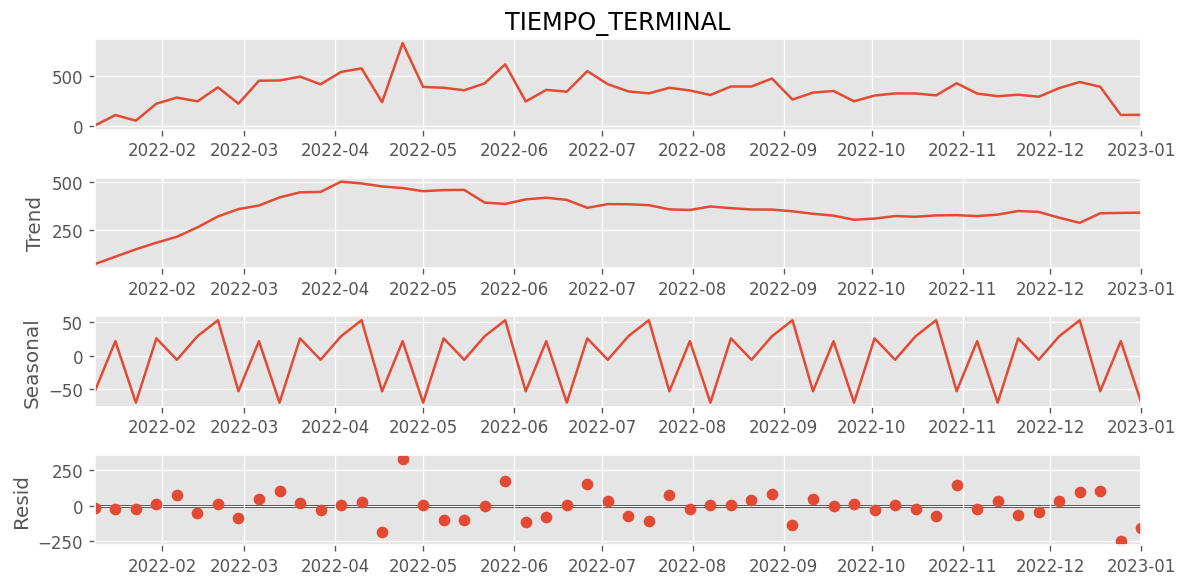

In [42]:
# descomposición de la serie de tiempo DIFERENCIA_ENTRADA
from statsmodels.tsa.seasonal import seasonal_decompose
df_grouped = df_time.groupby(pd.Grouper(freq='w')).sum()
plt.rcParams.update({'figure.figsize': (10,5), 'figure.dpi': 120})

result = seasonal_decompose(df_grouped["TIEMPO_TERMINAL"], model='additive', period=7, two_sided=True, extrapolate_trend=7)
result.plot()
plt.show()

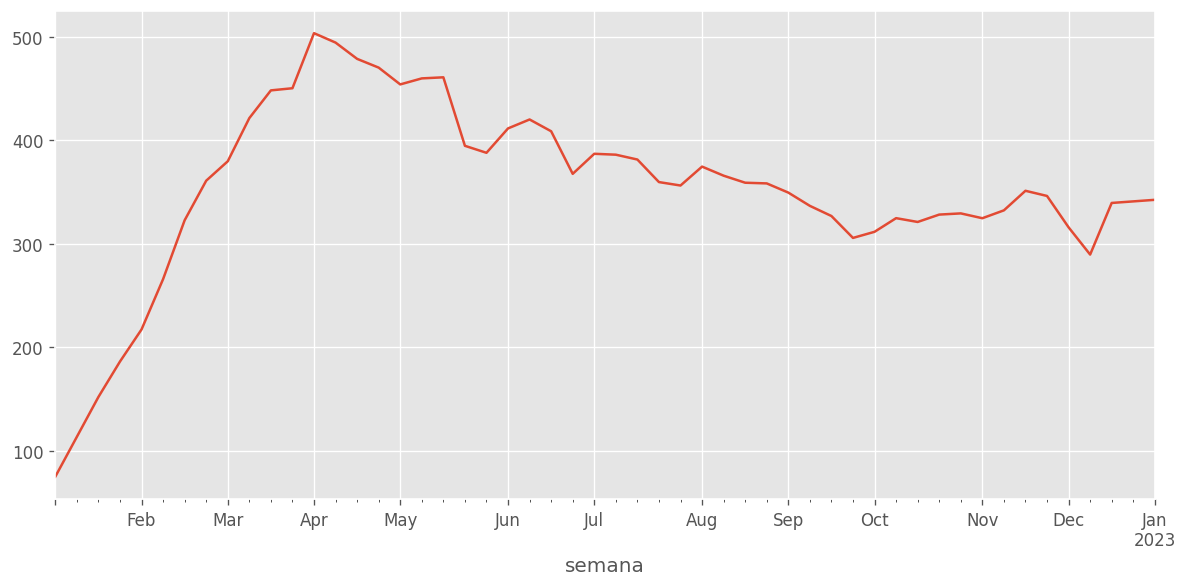

In [32]:
result.trend.plot()
plt.tight_layout()
plt.xlabel('semana')
plt.show()

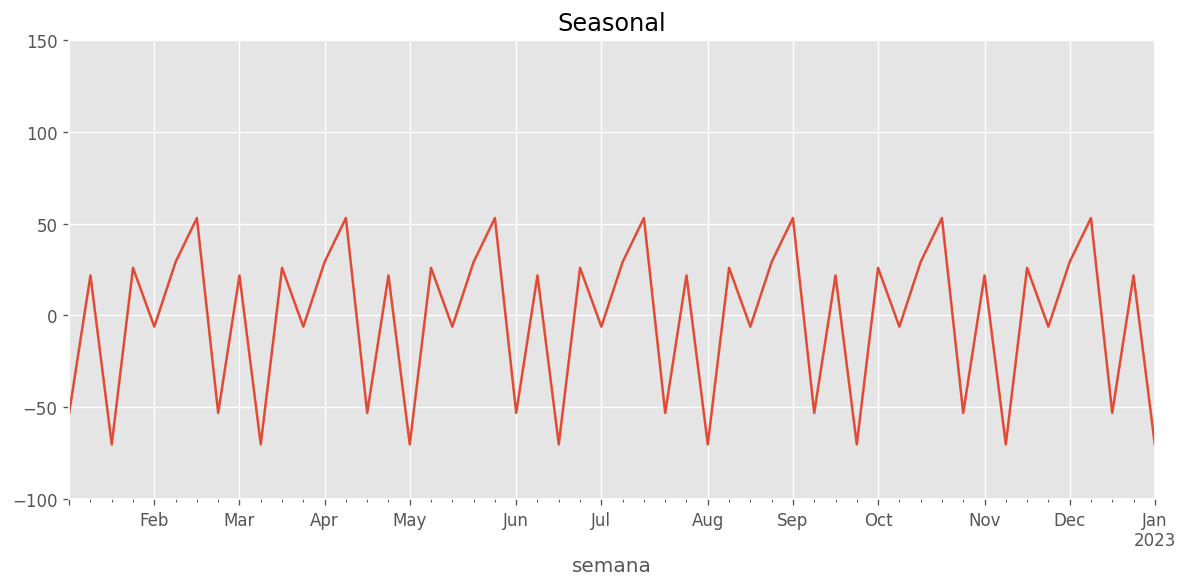

In [33]:
result.seasonal.plot().set_ylim(-100,150)
plt.title('Seasonal')
plt.xlabel('semana')
plt.tight_layout()
plt.show()

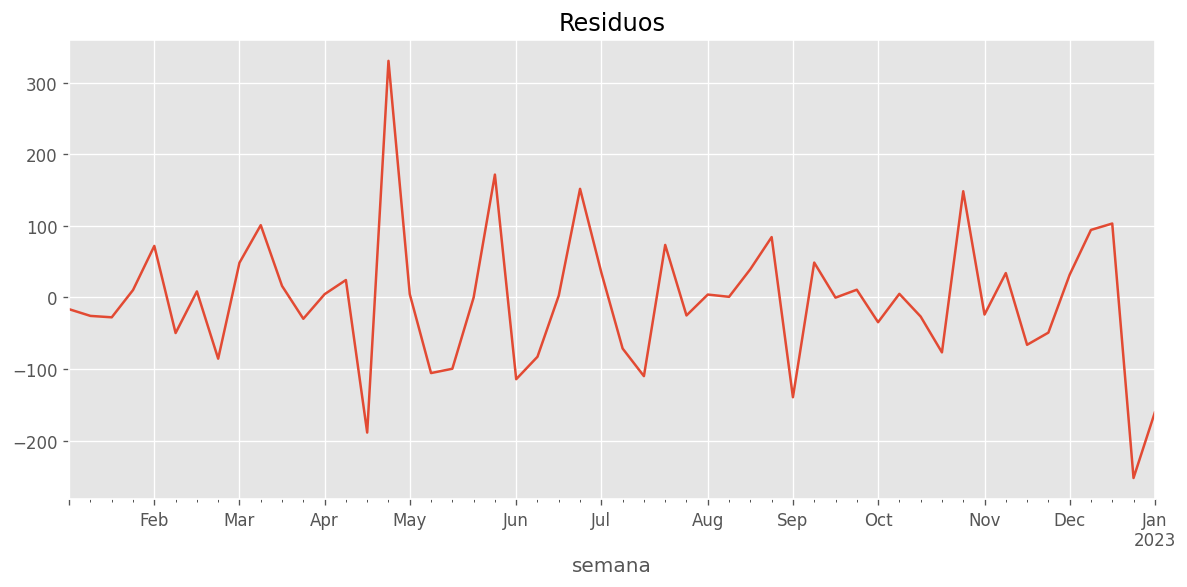

In [34]:
result.resid.plot().set_title('Residuos')
plt.tight_layout()
plt.xlabel('semana')
plt.show()

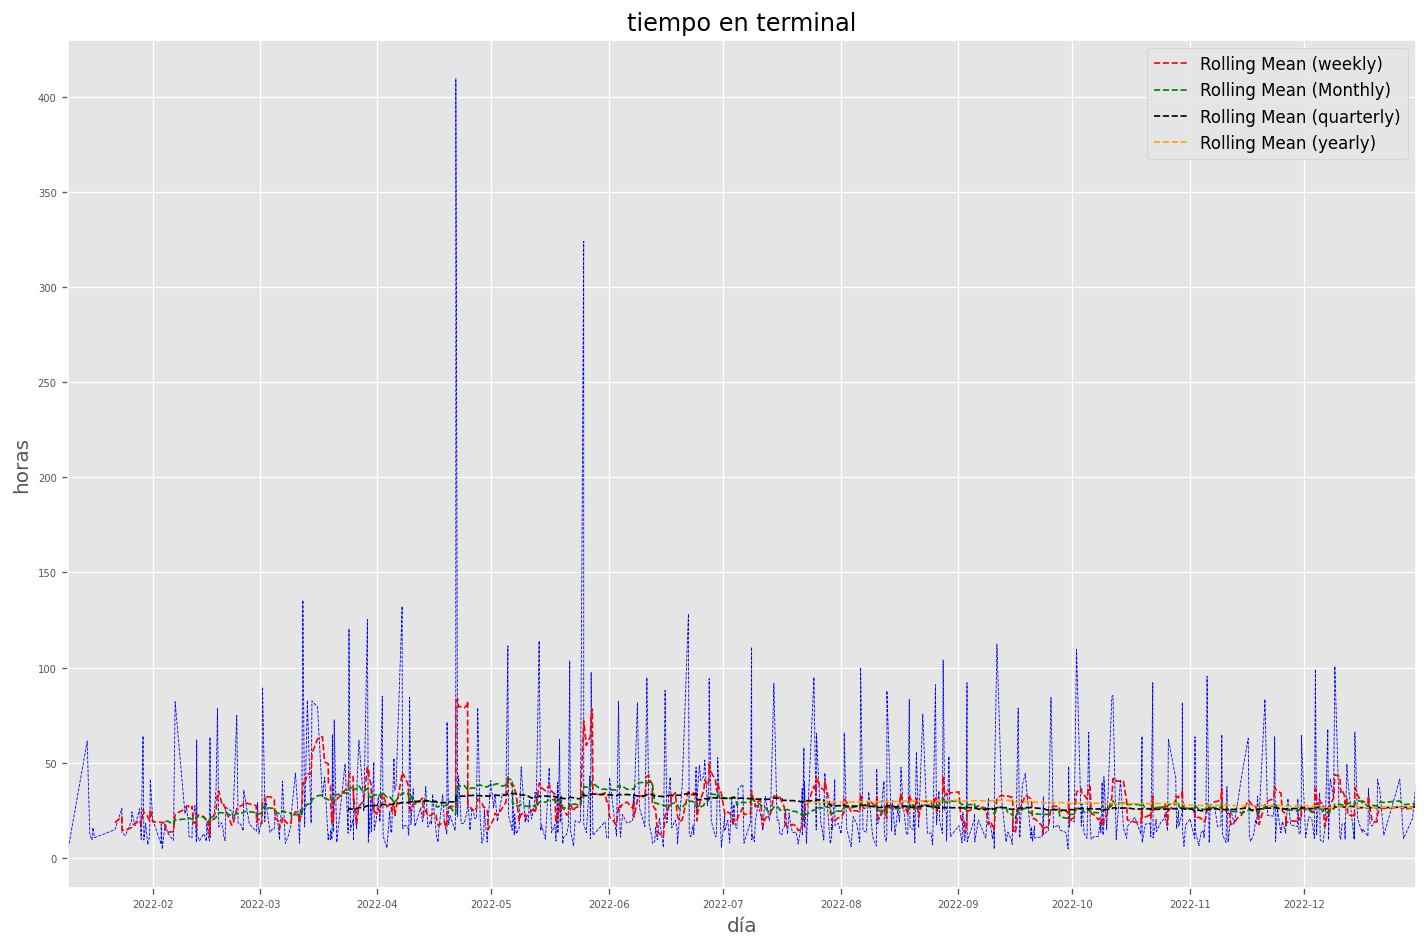

In [47]:
#orderna df_time por index 
df_time = df_time.sort_index()

plt.figure(figsize=(12, 8))
plt.plot(df_time["TIEMPO_TERMINAL"], color='blue', linewidth=0.5, linestyle='--')
plt.plot(df_time["TIEMPO_TERMINAL"].rolling(7).mean(), label='Rolling Mean (weekly)', color='red', linestyle='--', linewidth=1)
plt.plot(df_time["TIEMPO_TERMINAL"].rolling(30).mean(), label='Rolling Mean (Monthly)', color='green', linestyle='--', linewidth=1)
plt.plot(df_time["TIEMPO_TERMINAL"].rolling(120).mean(), label='Rolling Mean (quarterly)', color='black', linestyle='--', linewidth=1)
plt.plot(df_time["TIEMPO_TERMINAL"].rolling(365).mean(), label='Rolling Mean (yearly)', color='orange', linestyle='--', linewidth=1)

plt.title('tiempo en terminal')
plt.xlabel('día')
plt.ylabel('horas')
# cambiamos el tamaño de la fuente de los ejes
plt.tick_params(axis='both', which='major', labelsize=6)
# cambiamos los limites del eje x para que se vean mejor los datos
plt.xlim(df_time.index[0], df_time.index[-1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

____

____
